# Database

`speXtra` come with a in-built database of spectral libraries, astronomical filters and extinction curves. The database is constinously growing and we are happy to include additional data that can be useful for your research

The database organized through `yaml` files which describe the contents of the different data files.

The inner workings of the database are transparent to the user and generally the user does not
need to deal with the database when working with `speXtra`.

There are however few things that might be useful to the user, specially when working in interactive mode
(e.g. Jupyter Notebooks)

The database is organized within a directory tree. Depending on what you are requesting, a spectra template,
a extinction curve or a filter, it will look for it at that particular place. The syntax is standard:

- `"library_name/template_name"` for a spectral template
- `"extinction_curve_family/extinction_curve_name"` for extinction curves
- `"filter_system/filter_name"` for astronomical filters

Below you can find the contents of the database

## Browsing the Database

In [1]:
from spextra import Database

db = Database()

print(db) 

 Database: 
 url: https://homepage.univie.ac.at/miguel.verdugo/database/ 
 path: /home/mverdugo/.astropy/cache/spextra 


The last will print basic information regarding local and distant storage

We can also obtain a good summary of the contents of the database with

In [2]:
db.dump()

libraries:
    ref: A library of reference stars
    kc96: Kinney-Calzetti Atlas
    pickles: Pickles Stellar Library
    dobos: SDSS galaxy composite spectra
    irtf: IRTF spectral library
    agn: AGN templates
    nebulae: Emission line nebulae
    brown: Galaxy SEDs from the UV to the Mid-IR
    kurucz: Subset of Kurucz 1993 Models
    sne: Supernova Legacy Survey
    moehler: flux/telluric standards with X-Shooter
    madden: High-Resolution Spectra of Habitable Zone Planets
    bosz/hr: BOSZ stellar atmosphere Grid - High Resolution
    bosz/mr: BOSZ stellar atmosphere Grid - Medium Resolution
    bosz/lr: BOSZ stellar atmosphere Grid - Low Resolution
    assef: Low-resolution spectral templates for AGN and galaxies
    sky: Paranal sky background spectra
    shapley: "Rest-Frame Ultraviolet Spectra of z \u223C 3 Lyman Break Galaxies"
    etc/kinney: ESO ETC version of the Kinney-Calzetti Atlas
    etc/kurucz: ESO ETC subset of the Kurucz 1993 models
    etc/marcs/p: ESO ETC sub

To list all available libraries we can also use:

In [3]:
db.libraries

{'ref': 'A library of reference stars',
 'kc96': 'Kinney-Calzetti Atlas',
 'pickles': 'Pickles Stellar Library',
 'dobos': 'SDSS galaxy composite spectra',
 'irtf': 'IRTF spectral library',
 'agn': 'AGN templates',
 'nebulae': 'Emission line nebulae',
 'brown': 'Galaxy SEDs from the UV to the Mid-IR',
 'kurucz': 'Subset of Kurucz 1993 Models',
 'sne': 'Supernova Legacy Survey',
 'moehler': 'flux/telluric standards with X-Shooter',
 'madden': 'High-Resolution Spectra of Habitable Zone Planets',
 'bosz/hr': 'BOSZ stellar atmosphere Grid - High Resolution',
 'bosz/mr': 'BOSZ stellar atmosphere Grid - Medium Resolution',
 'bosz/lr': 'BOSZ stellar atmosphere Grid - Low Resolution',
 'assef': 'Low-resolution spectral templates for AGN and galaxies',
 'sky': 'Paranal sky background spectra',
 'shapley': 'Rest-Frame Ultraviolet Spectra of z ∼ 3 Lyman Break Galaxies',
 'etc/kinney': 'ESO ETC version of the Kinney-Calzetti Atlas',
 'etc/kurucz': 'ESO ETC subset of the Kurucz 1993 models',
 'etc/

which also works for `db.filter_systems` and `db.extinction_curves` which will print the extinction curves and filter systems available

---

The class `SpecLibrary` and its equivalents `FilterSystem` and `ExtinctionCurve` hold the information regarding a particular library


In [4]:
from spextra.database import SpecLibrary, FilterSystem, ExtCurvesLibrary

lib = SpecLibrary("ref")

lib

 Spectral Library: ref Reference library for objects 
 spectral coverage: ['uv', 'vis', 'nir', 'mir'] 
 wave_unit: Angstrom  flux_unit: FLAM 
 Templates: ['vega', 'vegaLR', 'sirius', 'sun', 'sunHR']

and basic information about the library will be printed

Whilst more complete information can be printed using the following command

In [5]:
lib.dump()

library_name: ref
type: stars
title: Reference library for objects
summary: 'This library collects few objects than an be used as reference for calculations

    '
reference: see CALSPEC
link: https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
spectral_coverage:
- uv
- vis
- nir
- mir
resolution: 10
wave_unit: Angstrom
flux_unit: FLAM
wave_column_name: WAVELENGTH
flux_column_name: FLUX
data_type: fits
file_extension: .fits
templates:
    vega: Vega spectrum, 900A to 300um
    vegaLR: Vega LR spectrum, 1148A to 2.6um
    sirius: Sirius spectrum, 900A to 300um
    sun: Solar spectrum,  1195A to 2.7um
    sunHR: Solar HR spectrum, 1500A to 300um



If you are only interested in the template names, just use

In [6]:
lib.template_names

['vega', 'vegaLR', 'sirius', 'sun', 'sunHR']

Finally to obtain one of these templates just call `Spextrum`

In [7]:
from spextra import Spextrum

In [8]:
sp = Spextrum("ref/sun")

updating/loading 'libraries/ref/sun.fits'


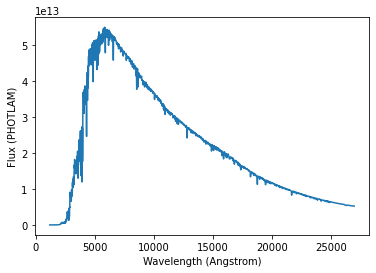

In [9]:
sp.plot()

to update the database (or a library) so your local copy contain the last additions please use

In [10]:
db.update()
lib.update()

updating/loading 'index.yml'
updating/loading 'libraries/ref/index.yml'


to remove the whole database (or a library)

In [11]:
db.remove_database()

database at /home/mverdugo/.astropy/cache/spextra removed


The database will be recreated next time you call it!